# Hypothesis: people in the In-Person Class are more likely to rate higher on understanding than those in Asynchronous.

Making sure my changes are autoreloaded and saved.

In [42]:
    %reload_ext autoreload
    %autoreload 2

Showing the computer how to find my data.

In [43]:
DATA_DIRECTORY="../../data"
DATA_FILE_PATH=f"{DATA_DIRECTORY}/survey.csv"

Reading the rows of a csv into a 'table' and converting this into a column-oriented table

In [44]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str,str]] = read_csv_rows(DATA_FILE_PATH)
columns: dict[str, list[str]] = columnar(data_rows)

Shows the first 10 rows of the section and understanding columns in a column based table (the two varriables we are comparing)

In [45]:
from data_utils import head, select

subset: dict[str, list[str]] = select(columns, ["section", "understanding"])
head(subset, 10)

{'section': ['In-Person',
  'In-Person',
  'Remote',
  '',
  'Remote',
  'Remote',
  'Remote',
  'Remote',
  'Remote',
  'Remote'],
 'understanding': ['4', '7', '6', '4', '4', '6', '4', '4', '5', '3']}

Initializing the dictionary where my most important data for analysis will be found and the lists where intermediate data will be stored

In [46]:
answer: dict[str, float] = {}
in_person: list[int] = []
remote: list[int] = []

Defining a function which can average the understanding values for each class and place them in a dictionary.

In [47]:
def helper(column_section: list[str], column_understanding: list[str]) -> dict[str, float]:
    """Averaging the in person students' understanding and the remote students' understanding."""

    """Makes 2 lists, rates of understanding for in-person and for remote."""
    i: int = 0
    while i < len(column_section):
        if column_section[i] == 'In-Person':
            in_person.append(column_understanding[i])
        if column_section[i] == 'Remote':
            remote.append(column_understanding[i])
        i += 1
    
    """Averages the understanding for each class and puts them into the dict."""
    average_person: int = 0
    for understanding in in_person:
        average_person += int(understanding)
    average_person = average_person/len(in_person)
    average_remote: int = 0
    for understanding in remote:
        average_remote += int(understanding)
    average_remote = average_remote/len(remote)
    answer["In_Person_Average_Understanding"] = average_person
    answer["Remote_Average_Understanding"] = average_remote
    
    return(answer)

Calling the helper function using our specific Class Section and Rate of Understanding values for the UNC 2021 Comp 110 survey values.

In [48]:
helper(subset['section'], subset['understanding'])

{'In_Person_Average_Understanding': 4.248571428571428,
 'Remote_Average_Understanding': 4.380208333333333}

Graph of my Data: Average Survey Values for the Rate of Understanding for the In Person vs. Remote Class Sections

<AxesSubplot:>

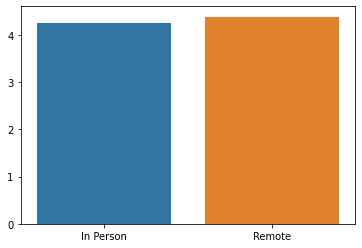

In [49]:
import seaborn

seaborn.barplot(x=["In Person", "Remote"], y=[answer["In_Person_Average_Understanding"], answer["Remote_Average_Understanding"]])

Graph: A histogram of the Count of Students in the In Person Class and their Rated Understanding from 1-7

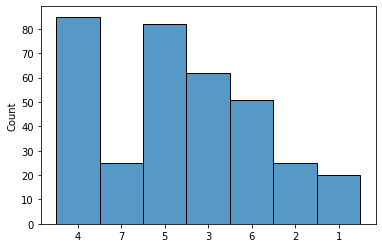

In [50]:
import seaborn

graphy = seaborn.histplot(data=in_person)
# graphy.axes('The Title')

Graph: A histogram of the Count of Students in the Remote Class and their Rated Understanding from 1-7

<AxesSubplot:ylabel='Count'>

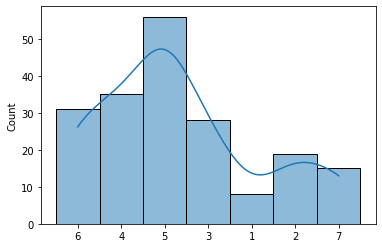

In [51]:
import seaborn

seaborn.histplot(data=remote, kde=True)

A summary of whether or not my data supports my hypothesis.

In [52]:
if answer["In_Person_Average_Understanding"] > answer["Remote_Average_Understanding"]:
    print(f"My hypothesis was correct, because the In-Person class rated their understanding at an average of {answer['In_Person_Average_Understanding']}, which is greater than the Asynchronous Class's average understanding rating of {answer['Remote_Average_Understanding']}.")
else:
    print(f"My hypothesis was incorrect, because the In-Person class rated their understanding at an average of {answer['In_Person_Average_Understanding']}, which is less than or equal to the Asynchronous Class's average understanding rating of {answer['Remote_Average_Understanding']}.")

My hypothesis was incorrect, because the In-Person class rated their understanding at an average of 4.248571428571428, which is less than or equal to the Asynchronous Class's average understanding rating of 4.380208333333333.


## Conclusion

Surprisingly, the students in the asynchronous section rated themselves higher on understanding than those going to class in person. In other words, my data did not support my hypothesis. Perhaps this is because they get to watch the lectures at their own speed (using youtube's speed function) and from a location and time most comfortable for them.